C:\Users\fbeth\AppData\Local\Temp\ipykernel_7700\1420895251.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  y = [(r*(1/eta))+((100/v)*fix) for v,r in zip(x,y)]


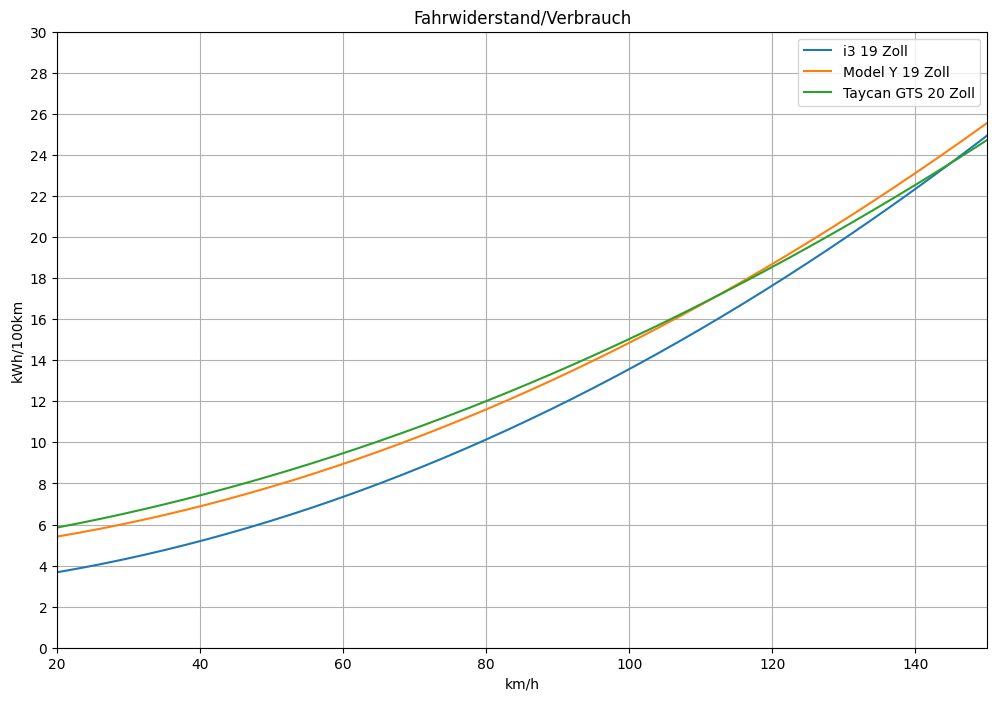

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#poly: 0.01851,1.6,211

curve = [0.01851,1.6,211] # 2474 kg Turbo
curve = [0.02239,1.6,251.2] # 2496 kg Turbo JC22?
curveRoll = [0.0,1.6,211] # nur Roll
curveLu = [0.01851,0.0,0.0] #  nur Luft
curve4S = [0.01737,1.6,192.1] # Prüfmasse 2334kg Taycan 4s kleine Batterie
curveGTS = [0.02187,1.508,171.8] # Taycan GTS Tatsächliche Masse: 2.418 kg Prüfmasse: 2.487 kg
curveModelY = [0.02658, 1.059,163.04] #2211kg 255er 19"
curvePanaGTS = [0.03036, 1.7, 212.6] # Panamera GTS
curvei3 = [0.0287,1.01,100.6 ] #i3 f0 100.6N, f1 1.01 , F2 0.0287 

x =  [x for x in np.linspace(0,250,251)]




r = [np.polyval(curve, i) for i in x]
rroll = [np.polyval(curveRoll, i) for i in x]
rlu = [np.polyval(curveLu, i) for i in x]
r4s = [np.polyval(curveGTS, i) for i in x]
rmy = [np.polyval(curveModelY, i) for i in x]
ri3 = [np.polyval(curvei3, i) for i in x]

y = [y/36 for y in r]
yr = [y/36 for y in rroll]
y4s = [y/36 for y in r4s]
yl = [y/36 for y in rlu]
ymy = [y/36 for y in rmy]
yi3 = [y/36 for y in ri3]


eta = 0.85 #90%
fix = 0.55 #~ 1 kW ständiger Verbrauch für ECUs etc.

#plt.plot(x,y, label="Taycan Turbo 20Zoll ")
y = [(r*(1/eta))+((100/v)*fix) for v,r in zip(x,y)]

plt.grid(True)
#add title
plt.title("Fahrwiderstand/Verbrauch")
#add x and y labels

plt.xlabel("km/h")

#plt.plot(x,y, 'r--' ,label="Taycan Turbo  real ")
#plt.plot(x,yr, label="Taycan Rollwiderstand") #"Taycan 4S 19 kl. Akku")
#plt.plot(x,yl, label="Taycan Luftwiderstand") #"Taycan 4S 19 kl. Akku")
plt.plot(x,yi3,label="i3 19 Zoll")
plt.plot(x,ymy,label="Model Y 19 Zoll")
plt.plot(x,y4s, label="Taycan GTS 20 Zoll") #Taycan GTS 21" )
plt.legend()  

plt.ylabel("kWh/100km")
# change plot size
plt.rcParams["figure.figsize"] = (8,6)
# grid granularity
plt.yticks(np.arange(0, 60, 2))
plt.ylim(0,30)
plt.xlim(20,150)

plt.show()


In [ ]:
eta=0.9 #90%
fix = 1 #1 kW

y = [r*eta+((100/v)*fix) for v,r in zip(x,y)]
y4s = [y*eta for y in y4s]
ymy = [y*eta for y in ymy]
y


# Refactoring: #
einfacherer Ansatz ohne Numpy, übersichtlicher!

173.56159979423865 Aero only 15°C
243.8271604938271 M3 SR 18
84.79938271604937 M3 SR 18 only rolling resistance
161.9907407407407 M3 SR 18 only aero 20°C
254.2052469135802 M3 LR 19
275.27777777777777 M3 P 20
174.35185185185182 M3 P 20 only aero 20°C
286.895061728395 Model Y 19
280.0771604938271 BMW i3


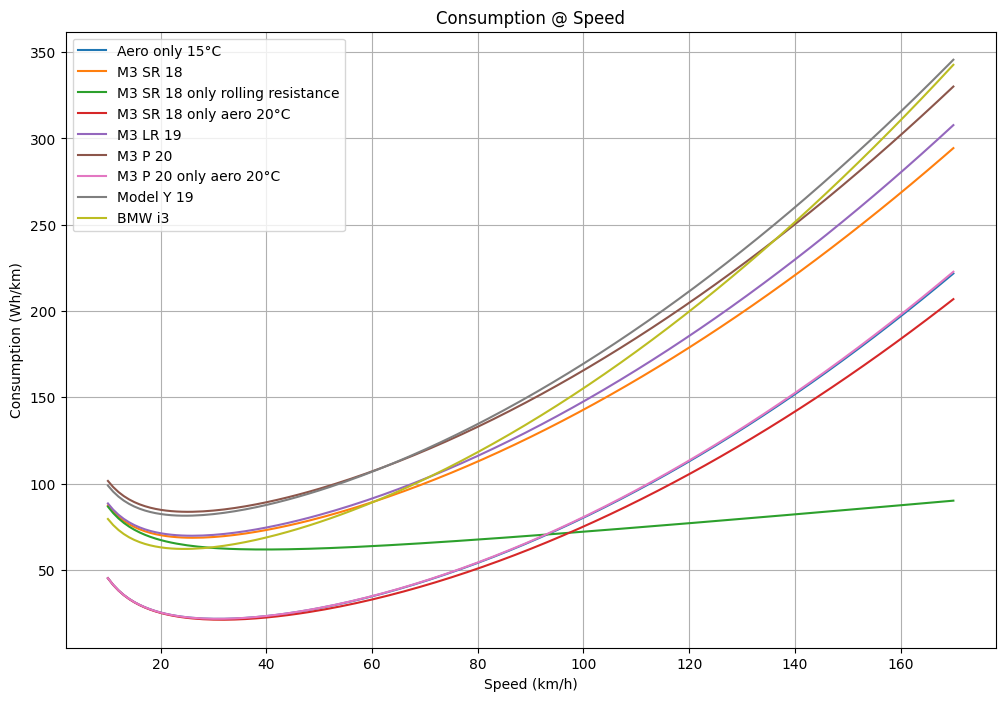

In [51]:
import matplotlib.pyplot as plt

# Set the range of speeds to plot (in km/h)
min_speed = 10
max_speed = 170
speed_step = 1
speeds = range(min_speed, max_speed + speed_step, speed_step)

frontal_area = 2.258 # m^2
drag_coefficient = 0.235
air_density = 1.20 # kg/m^3

# Calculate the air resistance force in N for each speed in km/h

M3aero15C= [0,0,0.5 * drag_coefficient * frontal_area * air_density * (1/3.6)**2, "Aero only 15°C" ]
#M3aero20C= [0,0,0.5 * 0.23 * frontal_area * air_density * (1/3.6)**2, "Aero only 15°C" ]


def plot_consumption(F0, F1, F2, name):
    constant_force = F0
    linear_coefficient = F1
    quadratic_coefficient = F2

    # Calculate the resitance force in N for each speed
    forces = [constant_force + (linear_coefficient * speed) + (quadratic_coefficient * speed ** 2) for speed in speeds]

    contant_power = 0.4 #kW
    # Calculate the power in kW for each speed with addional 0.5kW for the power electronics
    powers = [(force * (speed/3.6) / 1000) + contant_power for force, speed in zip(forces, speeds)]

    #apply the efficiency of 85%-90%
    powers = [power / 0.90 for power in powers]

    consumptions = [1000 * power / (speed)  for speed, power in zip(speeds, powers)]
   # find index of speeds where speed is 150
    index = speeds.index(150)
    print (consumptions[index], name)

    
    plt.plot(speeds,consumptions, label=name)
    plt.xlabel('Speed (km/h)')
    plt.ylabel('Consumption (Wh/km)')


M3sr18 = [127.6, 0.917, 0.02290, "M3 SR 18"] # Prüfmasse 1932kg
mssr18roll = [127.6,0.917,0,"M3 SR 18 only rolling resistance"]
mssr18raero = [0,0,0.02290,"M3 SR 18 only aero 20°C"]


M3lr19 = [131.6, 0.867, 0.02455, "M3 LR 19"] # Prüfmasse 1995kg
M3P20 = [172.2,1.032,0.02468, "M3 P 20"] # Prüfmasse 2003kg
m3p20Aero = [0,0,0.02468,"M3 P 20 only aero 20°C"]
MY19 = [163.04,1.059,0.02658,"Model Y 19"] # 2211kg 255er 19"

TaycanTurbo20 = [211,1.6,0.01851 , "Taycan Turbo"] # 2474 kg Turbo
Taycan21 = [251.2,1.6,0.02000, "Taycan Turbo 21"] # 2496 kg Turbo JC22?

plot_consumption(*M3aero15C)
#plot_consumption(*M3aero20C)
plot_consumption(*M3sr18)
plot_consumption(*mssr18roll)
plot_consumption(*mssr18raero)
plot_consumption(*M3lr19)
plot_consumption(*M3P20)
plot_consumption(*m3p20Aero)
# plot_consumption(*Taycan21)
# plot_consumption(*TaycanTurbo20)

plot_consumption(*MY19)

F0 = 100.6
F1 = 1.01 
F2 = 0.0287

plot_consumption(F0, F1, F2, "BMW i3")

plt.rcParams["figure.figsize"] = (12,8)
plt.title('Consumption @ Speed')
plt.grid(True)
plt.legend()
plt.show()
